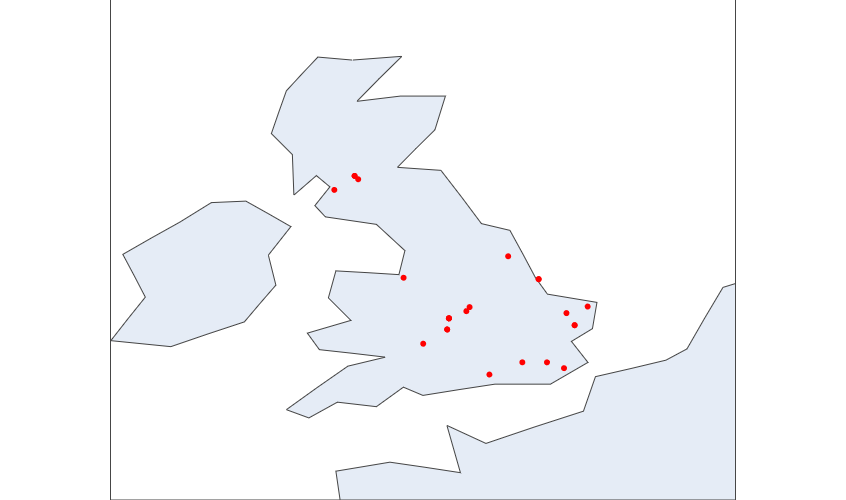

In [56]:
import pandas as pd
import numpy as np

from geopy.distance import geodesic as GD

import plotly.express as px
import plotly.graph_objects as go

dogShows = pd.read_csv('dogShows.csv', sep = ',')
df = pd.read_csv('ukpostcodes.csv', sep = ',')

codes = dogShows['Postcode']

lats = []
longs = []
dists = []

for i in codes:
    x = (df.loc[df['postcode'] == i])
    lats.append(x.iloc[0,2])
    longs.append(x.iloc[0,3])
    
dogShows['Lat'] = lats
dogShows['Long'] = longs

num = 0

for i in codes:
    home = (55.680932, -4.510708)
    target = (dogShows.iloc[num,3], dogShows.iloc[num,4])
    dists.append(GD(home,target).mi)
    num += 1

dists = list(np.around(np.array(dists),1))

dogShows['Distance'] = dists
dogShows = dogShows.sort_values(by=['Distance'])

#dogShows.to_csv('out.csv')

rangelist = [48,60]
rangelist1 = [-10,5]


fig = go.Figure(data=go.Scattergeo(
        lon = dogShows['Long'],
        lat = dogShows['Lat'],
        text = dogShows['Name'],
        mode = 'markers',
        marker_color = 'red',
        ))

fig.update_geos(lataxis=dict(range=list(rangelist)), lonaxis=dict(range=list(rangelist1)), projection_scale=1)
fig.update_layout(height=500, margin={"r":0,"t":0,"l":0,"b":0})

fig.show()